<a href="https://colab.research.google.com/github/jonathanahc/Proyecto/blob/main/ProyectoProgADAP_255497NvaVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Consumo y Costo del Agua en Nueva York
## Grupo: A
## Autor: Jonathan Adrian Herrera Castro
## Matrícula: 255497
## Fecha: 08/03/2025

# **1. Introducción**



## **- Descripción del problema:** el objetivo de este análisis es examinar el consumo de agua en la ciudad de Nueva York y su costo asociado, con el fin de identificar tendencias y algunos factores que influyen en su variación. Se analizarán patrones de consumo en distintas zonas y sectores de febrero del 2013 hasta 2023.

## **- Objetivo del análisis:** comprender el consumo y costo del agua en Nueva York para identificar patrones y factores que afectan su variabilidad. Este análisis tiene como impacto en el tema de la optimización el uso del agua, la planificación de tarifas y establecer algunas estrategias de sostenibilidad.

## **- Fuente de datos:** los datos utilizados en este análisis provienen de NYC Open Data, una plataforma que ofrece bases de datos de acceso público. La información fue proporcionada por la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés).

# **2. Información General del Conjunto de Datos**

El conjunto de datos sobre el consumo y costo del agua en Nueva York pertenece a la categoría de gestión de recursos hídricos urbanos, que abarca el análisis y control de la distribución de agua potable y la fijación de tarifas. Los datos recopilados incluyen información sobre el volumen de agua consumido en diferentes áreas de la ciudad, las tarifas establecidas para los consumidores, patrones de consumo y variaciones de precios. La fuente principal de estos datos es la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés), los informes y los datos sobre el consumo de agua se publican anualmente y están disponibles al público en su sitio web oficial.

El enlace para acceder a la base de datos es:
[Water Consumption And Cost (2013 - Feb 2025)](https://data.cityofnewyork.us/Housing-Development/Water-Consumption-And-Cost-2013-Feb-2025-/66be-66yr/about_data)

Estos datos se pueden encontrar en formato CSV lo cual facilita su acceso y análisis y son utilizados para diversos fines como el análisis - planificación de políticas públicas, gestión - mantenimiento de infraestructura y para pronósticos y ajustes tarifarios.

#**3. Descripción del Conjunto de Datos**


Como primera fase, se emplearon diversas librerías para facilitar el proceso de carga del archivo CSV. La primera librería utilizada fue google.colab, la cual establece la conexión a la carpeta Drive donde se encuentra almacenado el archivo. Además, se importaron las librerías Pandas y Re para interactuar con los datos.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Con esta sentencia, se cargó el archivo CSV en un dataframe sin presentar inconvenientes durante el proceso.

In [28]:
df = pd.read_csv('/content/drive/MyDrive/ProyectoProgramacion/Water_Consumption_And_Cost__2013_-_Feb_2023__20250216.csv', engine="python")

Una vez cargado el archivo, se validó que los datos se mostrarán correctamente.

In [29]:
df.head(3)

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges
0,HOWARD AVENUE,BROOKLYN,HOWARD AVENUE,BLD 02,AMR,NaN,339.0,782,K033900,FEDERAL,...,04/23/2020,31.0,E11310572,N,2945.22,Basic Water and Sewer,Yes,285,2945.22,0.0
1,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,01/26/2020,34.0,K13060723,N,196.35,Basic Water and Sewer,Yes,19,196.35,0.0
2,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91.0,240,Q009100,FEDERAL,...,02/24/2020,29.0,K13060723,N,258.35,Basic Water and Sewer,Yes,25,258.35,0.0


Utilizando la función Shape, se realizó un conteo del número de filas y columnas del dataframe.

In [30]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 50315, Columnas: 25


Después del conteo, se utilizó la función Info con la cual se obtuvó la información sobre las columnas, incluyendo el nombre y el tipo de dato de cada una.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50315 entries, 0 to 50314
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Development Name     50255 non-null  object 
 1   Borough              50315 non-null  object 
 2   Account Name         50315 non-null  object 
 3   Location             49487 non-null  object 
 4   Meter AMR            49805 non-null  object 
 5   Meter Scope          12782 non-null  object 
 6   TDS #                50255 non-null  float64
 7   EDP                  50315 non-null  int64  
 8   RC Code              50315 non-null  object 
 9   Funding Source       50239 non-null  object 
 10  AMP #                50193 non-null  object 
 11  Vendor Name          50315 non-null  object 
 12  UMIS BILL ID         50315 non-null  int64  
 13  Revenue Month        50315 non-null  object 
 14  Service Start Date   50308 non-null  object 
 15  Service End Date     50308 non-null 

Con la función Describe se proporcionó un resumen estadístico de cada columna.

In [32]:
df.describe(include='all')

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (HCF),Water&Sewer Charges,Other Charges
count,50255,50315,50315,49487,49805,12782,50255.000000,50315.000000,50315,50239,...,50308,50308.000000,50315,50315,50315.000000,50279,50315,50315.000000,50315.000000,50315.000000
unique,110,7,117,305,3,59,NaN,NaN,114,6,...,1114,NaN,795,2,NaN,5,2,NaN,NaN,NaN
top,FHA REPOSSESSED HOUSES (GROUP V),FHA,FHA REPOSSESSED HOUSES (GROUP V),BLD 01,AMR,Community Center,NaN,NaN,Q026000,FEDERAL,...,03/24/2019,NaN,UN-METERED,N,NaN,Basic Water and Sewer,Yes,NaN,NaN,NaN
freq,4765,23460,4759,4459,43782,1228,NaN,NaN,4765,45346,...,594,NaN,179,41499,NaN,50175,49235,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,258.871794,463.205764,NaN,NaN,...,NaN,33.182953,NaN,NaN,2150.221066,NaN,NaN,224.291066,2140.327436,9.893631
std,NaN,NaN,NaN,NaN,NaN,NaN,101.467018,185.109210,NaN,NaN,...,NaN,53.181840,NaN,NaN,5623.852543,NaN,NaN,2020.962056,5619.812518,607.714232
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,200.000000,NaN,NaN,...,NaN,-335.000000,NaN,NaN,-1748.510000,NaN,NaN,0.000000,0.000000,-67726.830000
25%,NaN,NaN,NaN,NaN,NaN,NaN,209.000000,325.000000,NaN,NaN,...,NaN,29.000000,NaN,NaN,46.460000,NaN,NaN,5.000000,46.360000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,273.000000,396.000000,NaN,NaN,...,NaN,30.000000,NaN,NaN,197.360000,NaN,NaN,26.000000,196.350000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,338.000000,637.000000,NaN,NaN,...,NaN,32.000000,NaN,NaN,2598.415000,NaN,NaN,236.000000,2575.520000,0.000000


# **4. Limpieza y Transformación del Conjunto de Datos**


Antes de proceder con la limpieza y transformación de los datos, se llevó a cabo un análisis detallado de las columnas del dataframe, basado en las estadísticas previamente calculadas. Este análisis tuvo como objetivo identificar variables irrelevantes y caracterizar la distribución de los datos para optimizar su tratamiento en las siguientes etapas del proceso.

Con base en este análisis, se determinó que las columnas Meter AMR, Meter Scope, EDP, Funding Source, AMP #, Vendor Name, Estimated y Bill Analyzed serían eliminadas, ya que no aportaban un valor significativo al análisis del dataframe y presentaban una baja variabilidad en la distribución de los datos.

A continuación, se presentan las gráficas que ilustran la distribución de los datos de las columnas eliminadas.

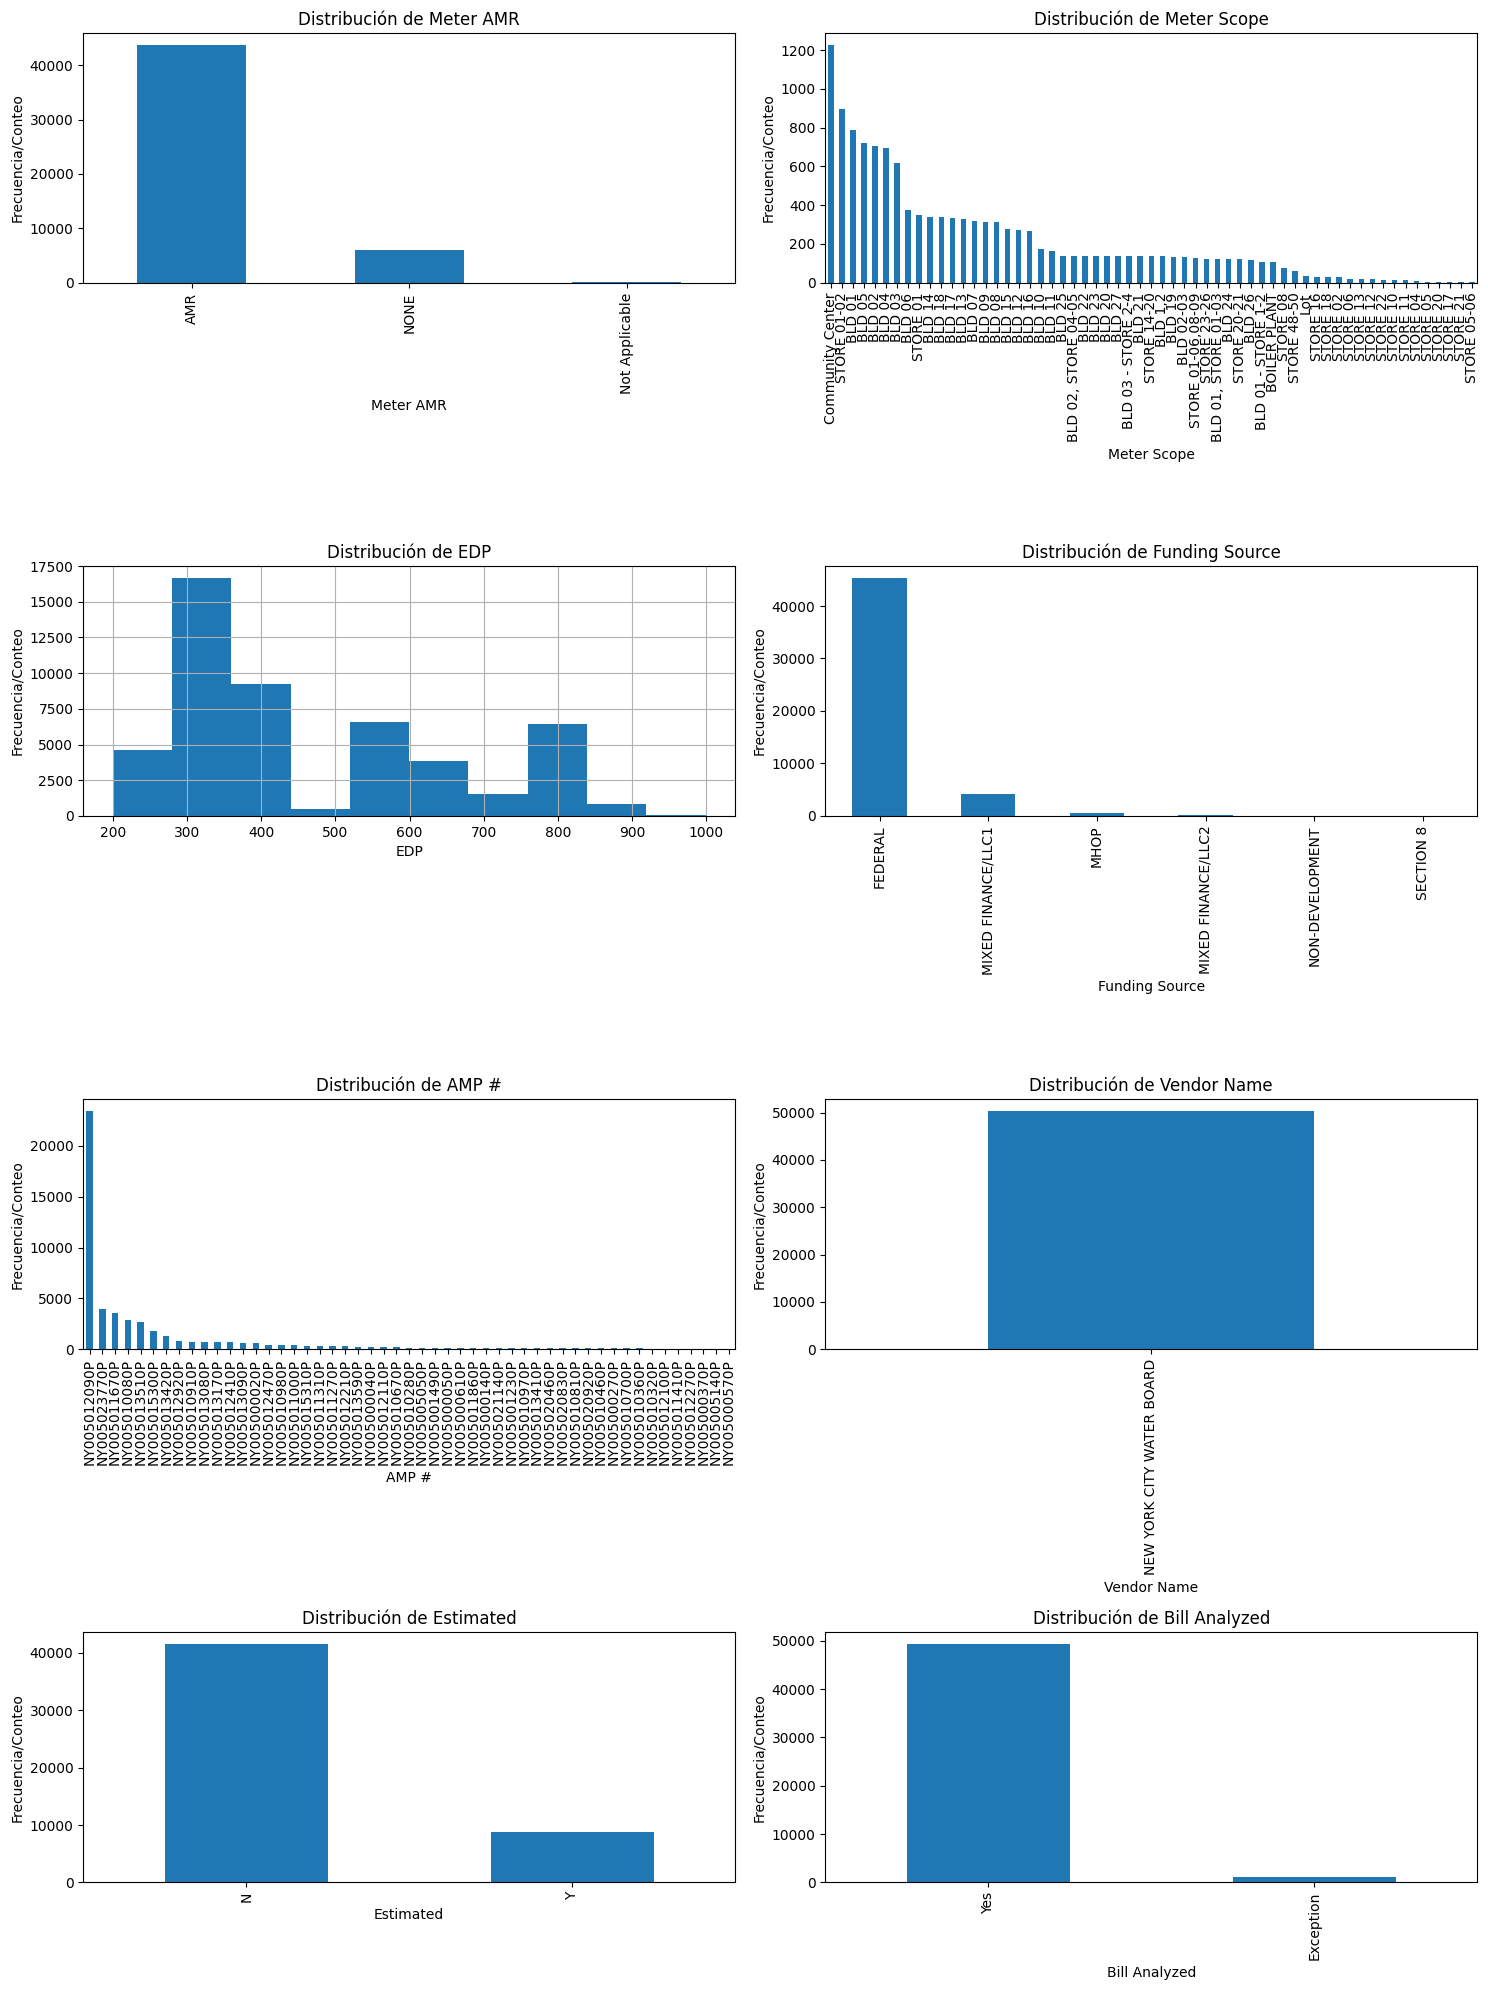

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.ravel()


columns_to_plot = ['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed']

for i, col in enumerate(columns_to_plot):
    try:
        if col in df.columns:
          if df[col].dtype == 'object':
              df[col].value_counts().plot(kind='bar', ax=axes[i])
          else:
              df[col].hist(ax=axes[i])
          axes[i].set_title(f'Distribución de {col}')
          axes[i].set_xlabel(col)
          axes[i].set_ylabel('Frecuencia/Conteo')
        else:
          axes[i].set_title(f"Column '{col}' no encontrada en Dataframe")

    except Exception as e:
        axes[i].set_title(f"Error al trazar {col}: {e}")

plt.tight_layout()
plt.show()


A continuación se muestra el código para eliminación de las columnas.

In [41]:
df = df.drop(columns=['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed'])

***Normalización de Nombres de Columnas***

Como primer paso en el proceso de normalización, se presentó una visión general de todas las columnas del DataFrame.

In [42]:
df.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'TDS #',
       'RC Code', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Current Charges',
       'Rate Class', 'Consumption (HCF)', 'Water&Sewer Charges',
       'Other Charges'],
      dtype='object')

A continuación, se identificaron las columnas que contenían caracteres especiales o espacios en blanco mediante una expresión regular.

In [43]:
for col in df.columns:
    if re.search(r'[^\w\s]', col) or re.search(r'\s', col):
      print(col)

Development Name
Account Name
TDS #
RC Code
UMIS BILL ID
Revenue Month
Service Start Date
Service End Date
# days
Meter Number
Current Charges
Rate Class
Consumption (HCF)
Water&Sewer Charges
Other Charges


Tras identificar las columnas, se procedió a su normalización mediante una expresión regular, lo que realizar esta expresión es reemplazar todos los caracteres que no sean alfanuméricos por una cadena vacía. Además, se aplicó la función lower() para convertir todos los nombres de las columnas a minúsculas.

In [44]:
df.columns = df.columns.str.lower().str.replace(r"\W+", "", regex=True)

Una vez completada la normalización, se verificaron los nombres de todas las columnas.

In [45]:
df.columns

Index(['developmentname', 'borough', 'accountname', 'location', 'tds',
       'rccode', 'umisbillid', 'revenuemonth', 'servicestartdate',
       'serviceenddate', 'days', 'meternumber', 'currentcharges', 'rateclass',
       'consumptionhcf', 'watersewercharges', 'othercharges'],
      dtype='object')

***Limpieza, Transformación y Normalización de Datos Temporales***

En esta sección, se trabajó con los datos temporales. Primero, la columna revenuemonth se convirtió al tipo Datetime, respetando el mismo formato presente en el archivo CSV.

In [46]:
df['revenuemonth'] = pd.to_datetime(df['revenuemonth'], format='%Y-%m')

A continuación, las columnas servicestartdate y serviceenddate se convirtieron al tipo Datetime, respetando el formato del archivo CSV.

Además, se implementó una estrategia para manejar los valores nulos, la cual consistió en reemplazarlos por NaT, ya que no se observa una secuencia en los valores de dichas columnas.

In [47]:
df['servicestartdate'] = pd.to_datetime(df['servicestartdate'], format='%m/%d/%Y', errors="coerce")
df['serviceenddate'] = pd.to_datetime(df['serviceenddate'], format='%m/%d/%Y', errors="coerce")

Por último, se verificó el nuevo tipo de datos en las columnas.

In [48]:
df[['revenuemonth', 'servicestartdate', 'serviceenddate']].dtypes

,0
revenuemonth,datetime64[ns]
servicestartdate,datetime64[ns]
serviceenddate,datetime64[ns]


***Corrección de Tipos de Datos y Manejo de Datos Perdidos***

Para el proceso de corrección de tipos de datos, primero se presentó una visión general del tipo de dato en cada columna.

In [49]:
df.dtypes

,0
developmentname,object
borough,object
accountname,object
location,object
tds,float64
rccode,object
umisbillid,int64
revenuemonth,datetime64[ns]
servicestartdate,datetime64[ns]
serviceenddate,datetime64[ns]


Además de verificar el tipo de cada columna, se comprobó la presencia de datos perdidos en ellas.

In [50]:
df.isnull().sum()

,0
developmentname,60
borough,0
accountname,0
location,828
tds,60
rccode,0
umisbillid,0
revenuemonth,0
servicestartdate,7
serviceenddate,7


Después de revisar los valores nulos se procedió con la corrección de los tipos de datos. Primero, las columnas tds y days fueron convertidas a tipo Int, ya que contienen únicamente valores enteros.

Para los valores nulos, se aplicó la estrategia de interpolación, dado que los datos siguen una secuencia lógica, lo que permite estimar los valores faltantes en función de sus vecinos.

In [51]:
df['tds'] = df['tds'].interpolate().astype(int)
df['days'] = df['days'].interpolate().astype(int)

Las columnas rccode y meternumber fueron convertidas al tipo Str.


In [54]:
df['rccode'] = df['rccode'].astype(str)
df['meternumber'] = df['meternumber'].astype(str)

Finalmente, las columnas restantes de tipo object fueron convertidas a category para optimizar el uso de memoria.

En cuanto a los valores nulos, se aplicó la estrategia de imputación por moda, ya que cada columna contenía un término recurrente, considerado el valor más probable para reemplazar los datos perdidos.

In [55]:
columnas = df.select_dtypes(include=['object']).columns

for col in columnas:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda).astype('category')

Después de haber realizado el proceso de la corrección y limpieza, se verificó el nuevo tipo de dato en las columnas.

In [56]:
df.dtypes

,0
developmentname,category
borough,category
accountname,category
location,category
tds,int64
rccode,category
umisbillid,int64
revenuemonth,datetime64[ns]
servicestartdate,datetime64[ns]
serviceenddate,datetime64[ns]


Además, se realizó una nueva validación de los valores nulos.

Cabe destacar que en las columnas servicestartdate y serviceenddate, los valores nulos se representan como NaT.

In [57]:
df.isnull().sum()

,0
developmentname,0
borough,0
accountname,0
location,0
tds,0
rccode,0
umisbillid,0
revenuemonth,0
servicestartdate,7
serviceenddate,7


Así quedó el DataFrame con los cambios realizados.

In [ ]:
df.head()

,developmentname,borough,accountname,location,meteramr,meterscope,tds,edp,rccode,fundingsource,...,serviceenddate,days,meternumber,estimated,currentcharges,rateclass,billanalyzed,consumptionhcf,watersewercharges,othercharges
0,HOWARD AVENUE,BROOKLYN,HOWARD AVENUE,BLD 02,AMR,Community Center,339,782,K033900,FEDERAL,...,2020-04-23,31,E11310572,N,2945.22,Basic Water and Sewer,Yes,285,2945.22,0.0
1,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91,240,Q009100,FEDERAL,...,2020-01-26,34,K13060723,N,196.35,Basic Water and Sewer,Yes,19,196.35,0.0
2,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91,240,Q009100,FEDERAL,...,2020-02-24,29,K13060723,N,258.35,Basic Water and Sewer,Yes,25,258.35,0.0
3,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91,240,Q009100,FEDERAL,...,2020-03-23,28,K13060723,N,217.02,Basic Water and Sewer,Yes,21,217.02,0.0
4,BAISLEY PARK,QUEENS,BAISLEY PARK,BLD 09,AMR,BLD 09,91,240,Q009100,FEDERAL,...,2020-04-23,31,K13060723,N,103.34,Basic Water and Sewer,Yes,10,103.34,0.0


In [ ]:
df.describe(include='all')

,developmentname,borough,accountname,location,meteramr,meterscope,tds,edp,rccode,fundingsource,...,serviceenddate,days,meternumber,estimated,currentcharges,rateclass,billanalyzed,consumptionhcf,watersewercharges,othercharges
count,50315,50315,50315,50315,50315,50315,50315.000000,50315.000000,50315,50315,...,50308,50315.000000,50315,50315,50315.000000,50315,50315,50315.000000,50315.000000,50315.000000
unique,110,7,117,305,3,59,NaN,NaN,114,6,...,NaN,NaN,795,2,NaN,5,2,NaN,NaN,NaN
top,FHA REPOSSESSED HOUSES (GROUP V),FHA,FHA REPOSSESSED HOUSES (GROUP V),BLD 01,AMR,Community Center,NaN,NaN,Q026000,FEDERAL,...,NaN,NaN,UN-METERED,N,NaN,Basic Water and Sewer,Yes,NaN,NaN,NaN
freq,4825,23460,4759,5287,44292,38761,NaN,NaN,4765,45422,...,NaN,NaN,179,41499,NaN,50211,49235,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,258.734473,463.205764,NaN,NaN,...,2017-11-07 20:14:14.703029504,33.200079,NaN,NaN,2150.221066,NaN,NaN,224.291066,2140.327436,9.893631
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,200.000000,NaN,NaN,...,2013-01-14 00:00:00,-335.000000,NaN,NaN,-1748.510000,NaN,NaN,0.000000,0.000000,-67726.830000
25%,NaN,NaN,NaN,NaN,NaN,NaN,209.000000,325.000000,NaN,NaN,...,2015-04-23 00:00:00,29.000000,NaN,NaN,46.460000,NaN,NaN,5.000000,46.360000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,273.000000,396.000000,NaN,NaN,...,2017-11-23 00:00:00,30.000000,NaN,NaN,197.360000,NaN,NaN,26.000000,196.350000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,338.000000,637.000000,NaN,NaN,...,2020-02-09 00:00:00,32.000000,NaN,NaN,2598.415000,NaN,NaN,236.000000,2575.520000,0.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,559.000000,999.000000,NaN,NaN,...,2023-01-27 00:00:00,6968.000000,NaN,NaN,392036.460000,NaN,NaN,434200.000000,392036.460000,77796.690000


***Limpieza, Transformación y Normalización de Datos Categóricos***

Para este proceso de limpieza y transformación, se verificó primero el número de valores únicos en cada una de las columnas de tipo Category.

In [ ]:
for col in ['developmentname', 'borough', 'accountname', 'location', 'meteramr', 'meterscope', 'fundingsource', 'vendorname', 'rateclass']:
    print(f"Valores únicos en {col}: {df[col].value_counts()}")
    print("\n")

Valores únicos en developmentname: developmentname
FHA REPOSSESSED HOUSES (GROUP V)            4825
SAMUEL (CITY)                               3938
FHA REPOSSESSED HOUSES (GROUP I)            3739
FHA REPOSSESSED HOUSES (GROUP X)            3037
SOUTH JAMAICA II                            2602
                                            ... 
EDENWALD                                      11
BRYANT AVENUE-EAST 174TH STREET               10
EAST 152ND STREET-COURTLANDT AVENUE            9
WEST TREMONT AVENUE-SEDGWICK AVENUE AREA       6
FIRST HOUSES                                   1
Name: count, Length: 110, dtype: int64


Valores únicos en borough: borough
FHA                         23460
BROOKLYN                     9072
MANHATTAN                    8208
BRONX                        4908
QUEENS                       4474
STATEN ISLAND                 133
NON DEVELOPMENT FACILITY       60
Name: count, dtype: int64


Valores únicos en accountname: accountname
FHA REPOSSESSED HOUSES (G

Tras la verificación, se procedió a renombrar algunos datos. En este caso, se cambió 'Basic Water and Sewer' en la columna rateclass.

In [ ]:
df['rateclass'] = df['rateclass'].rename({'Basic Water and Sewer':'BASIC WATER AND SEWER'})

Se volvió a verificar los valores únicos.

In [ ]:
print(df['rateclass'].unique())

['BASIC WATER AND SEWER', 'MULTIFAMILY', 'WATER-METER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE']
Categories (5, object): ['BASIC WATER AND SEWER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE', 'MULTIFAMILY',
                         'WATER-METER']


Se realizó un conteo de los valores únicos.

In [ ]:
print(df['rateclass'].value_counts())

rateclass
BASIC WATER AND SEWER         50211
HOT OR COLD WATER IN STORE       90
COMMERCIAL                        9
WATER-METER                       3
MULTIFAMILY                       2
Name: count, dtype: int64


En la columna meterscope, se renombraron los valores correspondientes a 'Community Center' y 'Lot'.

In [ ]:
df['meterscope'] = df['meterscope'].replace({'Community Center':'COMMUNITY CENTER'})
df['meterscope'] = df['meterscope'].replace({'Lot':'LOT'})

<ipython-input-214-c1f76ee6ef3e>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['meterscope'] = df['meterscope'].replace({'Lot':'LOT'})


Se verificaron los valores únicos.

In [ ]:
print(df['meterscope'].unique())

['COMMUNITY CENTER', 'BLD 09', 'BLD 02', 'BLD 04', 'BLD 03', ..., 'STORE 13', 'STORE 16', 'STORE 10', 'STORE 11', 'STORE 12']
Length: 59
Categories (59, object): ['BLD 01', 'BLD 01 - STORE 1-2', 'BLD 01, STORE 01-03', 'BLD 02', ...,
                          'STORE 21', 'STORE 22', 'STORE 23-26', 'STORE 48-50']


Se realizó un conteo de los valores únicos.

In [ ]:
print(df['meterscope'].value_counts())

meterscope
COMMUNITY CENTER       38761
STORE 01-02              898
BLD 01                   787
BLD 05                   723
BLD 02                   706
BLD 04                   693
BLD 03                   616
BLD 06                   376
STORE 01                 351
BLD 14                   340
BLD 18                   338
BLD 17                   335
BLD 13                   331
BLD 07                   319
BLD 09                   315
BLD 08                   312
BLD 15                   276
BLD 12                   274
BLD 16                   268
BLD 10                   173
BLD 11                   166
BLD 22                   139
BLD 02, STORE 04-05      139
BLD 25                   139
BLD 27                   138
BLD 20                   138
BLD 23                   138
BLD 03 - STORE 2-4       137
BLD 21                   136
BLD 1,2                  136
STORE 14-20              136
BLD 19                   131
BLD 02-03                130
STORE 01-06,08-09        129
STO

A continuación, se continuó con el proceso de renombramiento en la columna meteramr, específicamente para los datos marcados como Not Applicable.

In [ ]:
df['meteramr'] = df['meteramr'].replace({'Not Applicable':'NOT APPLICABLE'})

<ipython-input-204-e10e0fe17a97>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['meteramr'] = df['meteramr'].replace({'Not Applicable':'NOT APPLICABLE'})


Se verificaron los valores únicos.

In [ ]:
print(df['meteramr'].unique())

['AMR', 'NONE', 'NOT APPLICABLE']
Categories (3, object): ['AMR', 'NONE', 'NOT APPLICABLE']


Se realizó el conteo de los valores únicos.

In [ ]:
print(df['meteramr'].value_counts())

meteramr
AMR               44292
NONE               5983
NOT APPLICABLE       40
Name: count, dtype: int64


Por último, para la columna location, se renombraron los valores 'Lot' y, utilizando una expresión regular, se actualizaron los valores que terminan con 'Community Center'.

In [ ]:
df['location'] = df['location'].replace({'Lot':'LOT'})
df['location'] = df['location'].str.replace(r'Community Center$', 'COMMUNITY CENTER', regex=True)

Se verificaron los valores únicos.

In [ ]:
print(df['location'].unique())

['BLD 02' 'BLD 09' 'BLD 25 - COMMUNITY CENTER' 'BLD 04' 'BLD 03' 'BLD 01'
 'BLD 06' 'BLD 07' 'BLD 15' 'BLD 13' 'BLD 11' 'BLD 08' 'BLD 18' 'BLD 16'
 'BLD 10' 'BLD 14' 'BLD 12' 'BLD 05' 'BLD 17' '202-06 116TH AVENUE'
 '148-13 SUTTER AVENUE' '1502 BEACH 12TH STREET' '114-22 166TH STREET'
 '132-19 BENNETT COURT' '143-03 105TH AVENUE' '104-06 FARMERS BOULEVARD'
 '150-36 116TH ROAD' '118-03 204TH STREET' '178-14 BAISLEY BOULEVARD'
 '194-17 114TH DRIVE' '132-33 218TH STREET' '1504 BEACH 12TH STREET'
 '114-69 145TH STREET' '218-34 119TH AVENUE' '187-24 KEESEVILLE AVENUE'
 '213-24 NASHVILLE BOULEVARD' '117-22 133RD STREET'
 '137-22 WESTGATE STREET' '114-11 130TH STREET' '130-34 147TH STREET'
 '104-33 203RD STREET' '138-11 LINDEN BOULEVARD' '171-28 111TH AVENUE'
 '110-16 207TH STREET' '114-42 139TH STREET' '133-11 148TH STREET'
 '215-32 112TH AVENUE' '126-01 116TH AVENUE' '69-33 BAYFIELD AVENUE'
 '444 TORRY AVENUE' '223-20 FRANCIS LEWIS BOULEVARD' '105-11 171ST PLACE'
 '113-14 196TH STREET' '110

Se realizó el conteo de los valores únicos.

In [ ]:
print(df['location'].value_counts())

location
BLD 01                 5287
BLD 03                 2472
BLD 02                 2082
BLD 04                 1925
BLD 05                 1452
                       ... 
BLD 5                     9
BLD16 - STORE 35-36       4
BLD 7                     1
BLD02 - STORE 6 & 7       1
BLD 8                     1
Name: count, Length: 305, dtype: int64


***Outliers***

Para la detección de valores atípicos se realizaron una serie de pasos, el primero fue realizar una descripción estadística de algunas de las columnas de tipo númerico.

In [ ]:
columnas = ['tds', 'edp', 'days', 'currentcharges', 'consumptionhcf', 'watersewercharges']
print(df[columnas].describe())


                tds           edp          days  currentcharges  \
count  50315.000000  50315.000000  50315.000000    50315.000000   
mean     258.734473    463.205764     33.200079     2150.221066   
std      101.505109    185.109210     53.279154     5623.852543   
min        1.000000    200.000000   -335.000000    -1748.510000   
25%      209.000000    325.000000     29.000000       46.460000   
50%      273.000000    396.000000     30.000000      197.360000   
75%      338.000000    637.000000     32.000000     2598.415000   
max      559.000000    999.000000   6968.000000   392036.460000   

       consumptionhcf  watersewercharges  
count    50315.000000       50315.000000  
mean       224.291066        2140.327436  
std       2020.962056        5619.812518  
min          0.000000           0.000000  
25%          5.000000          46.360000  
50%         26.000000         196.350000  
75%        236.000000        2575.520000  
max     434200.000000      392036.460000  


Después, se obtuvó la desviación estándar de cada una de las columnas.

In [ ]:
df[columnas].std()

,0
tds,101.505109
edp,185.109210
days,53.279154
currentcharges,5623.852543
consumptionhcf,2020.962056
watersewercharges,5619.812518


Posterior al cálculo de la desviación estándar, se realizó el proceso de filtrado con el objetivo de obtener aquellos valores que son mayores a 3 veces por la desviación estándar.

In [ ]:
atipicos = df[columnas][(np.abs(df[columnas])>(3*df[columnas].std())).any(axis=1)]
print(atipicos)

       tds  edp  days  currentcharges  consumptionhcf  watersewercharges
0      339  782    31         2945.22             285            2945.22
5       92  670    34           72.34               7              72.34
6       92  670    29           82.67               8              82.67
7       92  670    28           62.00               6              62.00
8       92  670    31           39.34               1               0.00
...    ...  ...   ...             ...             ...                ...
50305  174  325    30        17000.61             204           17006.20
50308  246  325    91        49686.30             204           49686.30
50309  246  325    91        33959.56             204           33959.56
50310  246  325     1        43139.82             204           43139.82
50311  246  325    90        33422.14             204           33422.14

[17510 rows x 6 columns]


Para resolver el tema de los valores atípicos, se utilizó el método de Winsorización debido a que sólo se buscaba reemplazar valores extremos por menores sin afectar el tamaño del conjunto de datos.

Como primer paso, se identificaron y manejaron valores atípicos para la columna tds. Después se imprimió la estadística después de la Winsorización.

In [ ]:
winsorizing_fraction = 0.1
df['tds_Winsorized'] = winsorize(df['tds'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['tds_Winsorized'].describe())

count    50315.000000
mean       258.074252
std         90.807350
min         67.000000
25%        209.000000
50%        273.000000
75%        338.000000
max        377.000000
Name: tds_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


El procedimiento anterior se aplicó a la columna edp.

In [ ]:
df['edp_Winsorized'] = winsorize(df['edp'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['edp_Winsorized'].describe())

count    50315.000000
mean       466.793501
std        171.243360
min        293.000000
25%        325.000000
50%        396.000000
75%        637.000000
max        771.000000
Name: edp_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Lo mismo para la columna days.

In [ ]:
df['days_Winsorized'] = winsorize(df['days'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['days_Winsorized'].describe())

count    50315.000000
mean        30.443089
std          1.651348
min         28.000000
25%         29.000000
50%         30.000000
75%         32.000000
max         33.000000
Name: days_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


El mismo método para la columna currentcharges.

In [ ]:
df['currentcharges_Winsorized'] = winsorize(df['currentcharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['currentcharges_Winsorized'].describe())

count    50315.000000
mean      1532.156827
std       2111.072485
min         38.070000
25%         46.460000
50%        197.360000
75%       2598.415000
max       6128.920000
Name: currentcharges_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Mismo método para la columna consumptionhcf.

In [ ]:
df['consumptionhcf_Winsorized'] = winsorize(df['consumptionhcf'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['consumptionhcf_Winsorized'].describe())

count    50315.000000
mean       154.684448
std        200.882167
min          1.000000
25%          5.000000
50%         26.000000
75%        236.000000
max        595.000000
Name: consumptionhcf_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Por último, en la columna watersewercharges.

In [ ]:
df['watersewercharges_Winsorized'] = winsorize(df['watersewercharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['watersewercharges_Winsorized'].describe())

count    50315.000000
mean      1523.660031
std       2106.558553
min         36.800000
25%         46.360000
50%        196.350000
75%       2575.520000
max       6117.790000
Name: watersewercharges_Winsorized, dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


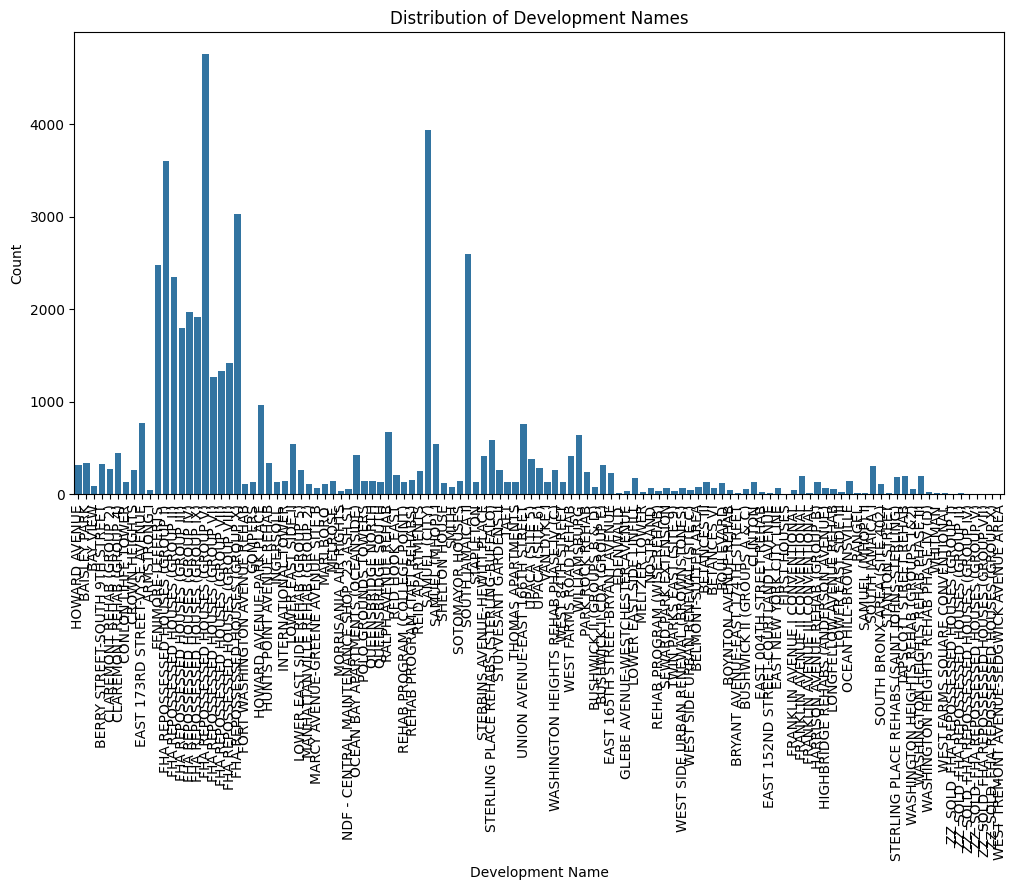

In [ ]:
# prompt: Gráfica la distribución de los datos de la columnas Development Name

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the provided code

plt.figure(figsize=(12, 6))
sns.countplot(x='Account Name', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Development Names')
plt.xlabel('Development Name')
plt.ylabel('Count')
plt.show()


# **5. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD
## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas

# **6. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

RECUERDA AGREGAR UNA O VARIAS CELDAS DE CÓDIGO

# **7. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados
RECUERDA AGREGAR UNA O VARIAS CELDAS DE CÓDIGO

# **8. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras

RECUERDA AGREGAR UNA O VARIAS CELDAS DE CÓDIGO